In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [4]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(10))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [5]:
y_train = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding="same",input_shape=(28, 28, 1), activation = 'relu'))
model.add(Conv2D(32, kernel_size=3, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['acc'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 703,210
Trainable params: 703,210
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=1024)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 171s 3ms/step - loss: 7.3379 - acc: 0.5185 - val_loss: 1.1132 - val_acc: 0.8577
Epoch 2/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.2086 - acc: 0.9448 - val_loss: 0.0762 - val_acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0563 - acc: 0.9828 - val_loss: 0.0504 - val_acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0304 - acc: 0.9907 - val_loss: 0.0517 - val_acc: 0.9833
Epoch 5/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0176 - acc: 0.9949 - val_loss: 0.0482 - val_acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0100 - acc: 0.9974 - val_loss: 0.0488 - val_acc: 0.9859
Epoch 7/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0054 - acc: 0.9989 - val_loss: 0.0502 - 

In [9]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 9s 940us/step


In [10]:
print("Accuracy: {0:.2f}%".format(score[1]*100))

Accuracy: 98.62%


In [11]:
y_pred = model.predict(x_test)

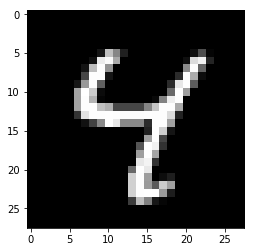

Prediction: 4


In [28]:
image = 6
plt.imshow(x_test[image].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print("Prediction: {0}".format(np.argmax(y_pred[image])))

In [54]:
correct_indices = np.nonzero(np.argmax(y_pred,axis=1) == np.argmax(y_test,axis=1))[0]
incorrect_indices = np.nonzero(np.argmax(y_pred,axis=1) != np.argmax(y_test,axis=1))[0]

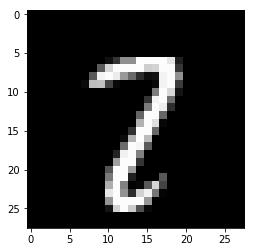

Prediction: 7


In [61]:
image = 3
plt.imshow(x_test[incorrect_indices[image]].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print("Prediction: {0}".format(np.argmax(y_pred[incorrect_indices[image]])))